# Evaluating the spring-mass system
A [`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) demo using the spring-mass system.

In [ ]:
# The imports that we're going to need:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Our governing equation:
$$
x''(t) + a x'(t) + b^2 x(t) = 0,
$$
$$
a = 0.1, \quad
b = 1, \quad
x(0) = 0.1, \quad
x'(0) = 0.0
$$

### Augmented state vector:
$$
\mathbf{y}(t) :=
\begin{bmatrix}
x(t) \\ x'(t)
\end{bmatrix} =
\begin{bmatrix}
y_1(t) \\ y_2(t)
\end{bmatrix}
$$
$$
\mathbf{y}'(t) = f(t, \mathbf{y}(t))
$$

`solve_ivp` needs 3 major things:
1) The ODE system defined by y'(t) = f(t, y(t))
2) The initial state condition y(0)
3) The time window (and possibly the time points) for evaluating y(t)

**GOAL:** Evaluate the state y(t) for various time points using only an initial condition and a set of governing differential equations.

In [ ]:
# 3) Times for evaluating y(t):
# Choose t = 0, 0.01, 0.02, ..., 10
t_all_values = np.arange(1001) * 0.01
t_start = 0
t_end = 10
t_all_values

array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ])

In [ ]:
# 2) Initial state condition:
# Note: This needs to be the same length as your state variable y(t)!
my_y0 = np.array([0.1, 0.0])

In [ ]:
# 1) The ODE system defined by y'(t) = f(t, y(t))
def my_ode(t, y):
    # Notes:
    # - function needs to be of the form f(t, y).
    # Args:
    # - t = time, will always just be a number.
    # - y = state, will always contain n elements,
    #       where n is the number of state variables.
    #       In our case, y = [y1, y2] = [x(t), x'(t)].
    # Returns:
    # - an n-element array, list, etc. that contains the
    #   time derivative of each of the state variables.
    #   In our case, it must return dy/dt = [dy1/dt, dy2/dt] = [x'(t), x''(t)].

    # Define the ODE parameters:
    a = 0.1
    b = 1

    # Grab the individual entries of the state vector:
    y1 = y[0]
    y2 = y[1]

    # Define dy1/dt and dy2/dt, given y1, y2, and t.
    dy1dt = y2
    dy2dt = -(b ** 2) * y1 - a * y2

    # Return the derivatives:
    return [dy1dt, dy2dt]

In [ ]:
# Finally, call solve_ivp!
solution = solve_ivp(
    fun=my_ode,
    t_span=[t_start, t_end],
    y0=my_y0,
    t_eval=t_all_values,
)
solution

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  9.990e+00  1.000e+01]
        y: [[ 1.000e-01  1.000e-01 ... -5.312e-02 -5.280e-02]
            [ 0.000e+00 -9.995e-04 ...  3.199e-02  3.249e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 80
     njev: 0
      nlu: 0

In [ ]:
# The y attribute of the returned object contains the states evaluated by the solver.
# Notice that it has dimension (number_of_states, number_of_time_points).
solution.y.shape

(2, 1001)

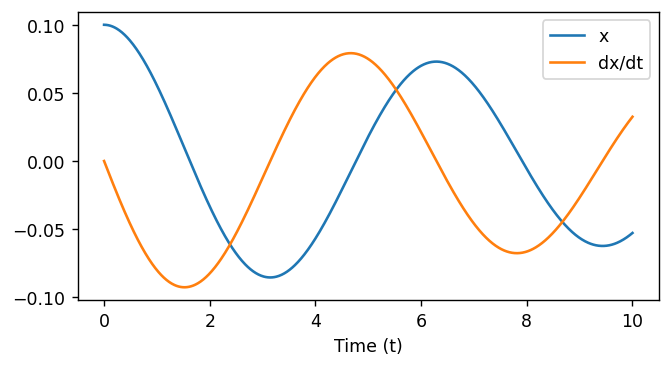

In [ ]:
# Since we define our state as y = [x(t), x'(t)],
# the first row of y contains our x(t) values, and
# the second row of y contains our x'(t) values.
x = solution.y[0, :]
dx = solution.y[1, :]

plt.figure(figsize=(6, 3), dpi=125)
plt.plot(t_all_values, x, label="x")
plt.plot(t_all_values, dx, label="dx/dt")
plt.xlabel("Time (t)")
plt.legend()
plt.show()